In [14]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
# import math

# Load your dataset
data = pd.read_csv('RiceTrain.csv')  # Replace 'your_data.csv' with your actual data file



In [15]:
# Split the data into train and test sets
train_data = data.iloc[:10]  # Use the first 228 rows as the train set
test_data = data.iloc[10:]  # Use the last 24 rows as the test set



In [16]:
# Define hyperparameters
input_size = 1  # Assuming you have only one feature
output_size = 1  # Forecasting a single value
hidden_size = 32  # Adjust as needed
learning_rate = 0.005  # Adjust as needed
num_epochs = 100 # Adjust as needed




In [17]:
# Convert data to PyTorch tensors
X_train = torch.Tensor(train_data['V'].values).reshape(-1, input_size, 1)
y_train = torch.Tensor(train_data['V'].values).reshape(-1, output_size, 1)

X_test = torch.Tensor(test_data['V'].values).reshape(-1, input_size, 1)
y_test = torch.Tensor(test_data['V'].values).reshape(-1, output_size, 1)
# print("x",X_train)
print("y",y_train)   

y tensor([[[6.9000]],

        [[7.1000]],

        [[8.0200]],

        [[6.5900]],

        [[6.3300]],

        [[6.5800]],

        [[6.5800]],

        [[5.8200]],

        [[6.1100]],

        [[6.3700]]])


In [18]:
class CNN1D(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=16, kernel_size=1)  # Adjust the kernel size
        self.fc1 = nn.Linear(in_features=16, out_features=32)
        self.fc2 = nn.Linear(in_features=32, out_features=output_size)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool1d(x, kernel_size=1)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
# class CNN1D(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, dropout_prob=0.5):
#         super(CNN1D, self).__init__()
#         self.conv1 = nn.Conv1d(in_channels=3, out_channels=32, kernel_size=1)
#         self.fc1 = nn.Linear(in_features=32, out_features=64)
#         self.fc2 = nn.Linear(in_features=64, out_features=32)
#         self.fc3 = nn.Linear(in_features=32, out_features=output_size)
#         self.dropout = nn.Dropout(p=dropout_prob)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = F.relu(x)
#         x = F.max_pool1d(x, kernel_size=1)
#         x = x.view(x.size(0), -1)
#         x = F.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = F.relu(self.fc2(x))
#         x = self.dropout(x)
#         x = self.fc3(x)
#         return x

In [19]:
# Initialize the model, loss function, and optimizer
model = CNN1D(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [20]:
# Training the model
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 23.9754
Epoch [20/100], Loss: 3.1963
Epoch [30/100], Loss: 2.9657
Epoch [40/100], Loss: 0.7382


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10, 1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [50/100], Loss: 1.0611
Epoch [60/100], Loss: 0.7188


Epoch [70/100], Loss: 0.7508
Epoch [80/100], Loss: 0.7241
Epoch [90/100], Loss: 0.7134
Epoch [100/100], Loss: 0.7135


[6.9  7.1  8.02 6.59 6.33 6.58 6.58 5.82 6.11 6.37 6.25 6.24]
[6.25 6.24]
[6.204595  6.1938734]


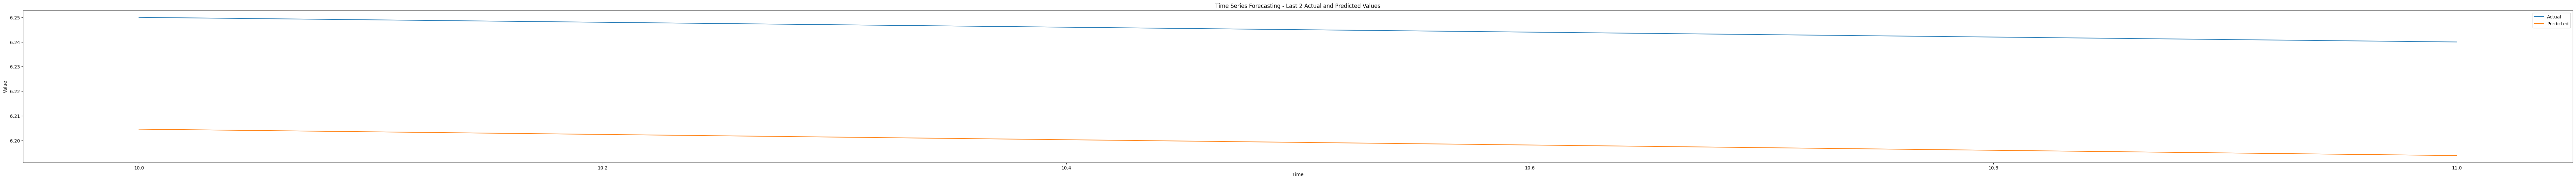

In [26]:
# Test the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    
# Convert the test outputs to a NumPy array for plotting
test_outputs = test_outputs.view(-1).numpy()
actual_value = data['V'].values[10:]
a =data['V'].values
print(a)
print(actual_value)
print(test_outputs)

# plt.figure(figsize=(100, 50))  # Adjust the figure size
# plt.plot(range(10, 12), actual_value, label='Actual')
# plt.plot(range(10, 12), test_outputs, label='Predicted')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.title('Time Series Forecasting - Last 2 Actual and Predicted Values')
# plt.show()


In [ ]:
import math
squared_errors = [(actual - predicted) ** 2 for actual, predicted in zip(actual_value, test_outputs)]
mse = sum(squared_errors) / len(actual_value)

# Calculate Root Mean Square Error (RMSE)
rmse = math.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = sum([abs(actual - predicted) for actual, predicted in zip(actual_value, test_outputs)]) / len(actual_value)

print(f"Mean Square Error (MSE): {mse}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Square Error (MSE): 0.35164567211950215
Root Mean Square Error (RMSE): 0.5929971940232956
Mean Absolute Error (MAE): 0.22394794082641595
